In [3]:
# load packages
library(Rgraphviz)      # |> suppressPackageStartupMessages()
library(bnlearn)        # |> suppressPackageStartupMessages()
library(bnstruct)       # |> suppressPackageStartupMessages()
source('K2methods.r')   # |> suppressPackageStartupMessages()
asia <- read.csv('https://www.ccd.pitt.edu/wiki/images/ASIA10k.csv')

Caricamento del pacchetto richiesto: graph

Caricamento del pacchetto richiesto: BiocGenerics




Caricamento pacchetto: 'BiocGenerics'


I seguenti oggetti sono mascherati da 'package:stats':

    IQR, mad, sd, var, xtabs


I seguenti oggetti sono mascherati da 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Caricamento del pacchetto richiesto: grid

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Caricamento del pacchetto richiesto: bitops

Caricamento del pacchetto richiesto: igraph

Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"

Caricamento pacchetto: 'igraph'


I seguenti ogg

In [4]:
# convert the dataset into a series of integers
asia.modified = asia
asia.modified[asia == "yes"] = 2
asia.modified[asia == "no"] = 1

for (i in 1:length(names(asia.modified))) {
    name = names(asia.modified)[i]
    asia.modified[, name] = as.factor(as.character(asia.modified[, name]))
}

In [5]:
DF = data.frame(asia.modified, stringsAsFactors = TRUE)

colnames(DF) <- names(asia)
head(DF)

,asia,tub,smoke,lung,bronc,either,xray,dysp
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,1,1,1,1,2
2,1,1,2,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,2,1,1,1,1,1
5,1,1,2,1,2,1,1,2
6,1,1,2,1,1,1,1,1


In [6]:
today = 03072023 # default seed = 12345

In [7]:
struct = K2(n = ncol(DF), u = 5, D = DF, seed=today, num.iterations=5)

order = asia tub smoke lung bronc either xray dysp 
Running iteration # 1 u = 1 
The Network score is -23080.29 
  Running iteration # 1 u = 2 
The Network score is -22268.26 
  Running iteration # 1 u = 3 
The Network score is -22268.26 
  Running iteration # 1 u = 4 
The Network score is -22268.26 
  Running iteration # 1 u = 5 
The Network score is -22268.26 
  order = smoke dysp bronc lung xray either tub asia 
Running iteration # 2 u = 1 
The Network score is -23225.34 
  Running iteration # 2 u = 2 
The Network score is -22458.34 
  Running iteration # 2 u = 3 
The Network score is -22350.25 
  Running iteration # 2 u = 4 
The Network score is -22350.25 
  Running iteration # 2 u = 5 
The Network score is -22350.25 
  order = either asia tub bronc smoke dysp lung xray 
Running iteration # 3 u = 1 
The Network score is -22991.46 
  Running iteration # 3 u = 2 
The Network score is -22322.79 
  Running iteration # 3 u = 3 
The Network score is -22303.28 
  Running iteration # 3 u =

| $num.iteration$ |                                    order                                   |    $best-u$   | $best-score_{K2}$ |
|:---------------:|:--------------------------------------------------------------------------:|:-------------:|:-----------------:|
|        1        | Asia Tubercolosys Smoke <br>LungCancer Bronchitis Either <br>X-ray Dyspnea | 2,3,4,5 |     -22268.26     |
|        2        | Smoke Dyspnea Bronchitis <br>LungCancer X-ray Either <br>Tubercolosys Asia |  3,4,5  |     -22350.25     |
|        2        | Either Asia Tubercolosys <br>Bronchitis Smoke Dyspnea <br>LungCancer X-ray |  3,4,5  |     -22303.28     |
|        3        | Bronchitis LungCancer Dyspnea <br>Either Asia Tubercolosys <br>Smoke X-ray |  3,4,5  |     -22308.58     |
|        4        |  Bronchitis Dyspnea Smoke<br>Asia LungCancer Tubercolosys <br>Either X-ray |  3,4,5  |     -22313.47     |
|        5        |  Tubercolosys Bronchitis LungCancer<br>Either Asia Smoke<br>X-ray Dyspnea  | 2,3,4,5 |     -22277.34     |
|        6        |  Tubercolosys Smoke LungCancer<br>Asia X-ray Either<br>Bronchitis Dyspnea  | 2,3,4,5 |     -22277.35     |
|        7        |  Dyspnea LungCancer Bronchitis<br>Either Tubercolosys X-ray <br>Asia Smoke |  3,4,5  |     -22308.58     |
|        8        |  Bronchitis X-ray Smoke<br>LungCancer Dyspnea Tubercolosys <br>Either Asia |  3,4,5  |     -22341.09     |
|        9        | X-ray Dyspnea Smoke <br>Asia Bronchitis LungCancer <br>Tubercolosys Either |    3    |      22400.09     |
|        10       | Bronchitis LungCancer Dyspnea <br>Tubercolosys Smoke Asia <br>Either X-ray | 2,3,4,5 |     -22295.71     |
|     $\vdots$    |                                  $\vdots$                                  |    $\vdots$   |      $\vdots$     |
|        50       | Tubercolosys Either Smoke <br>X-ray Dyspnea Asia <br>LungCancer Bronchitis |  3,4,5  |     -22310.81     |

In [8]:
struct

$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] NA

$dag[[3]]
[1] NA

$dag[[4]]
[1] 3

$dag[[5]]
[1] 3

$dag[[6]]
[1] 4 2

$dag[[7]]
[1] 6

$dag[[8]]
[1] 5 6


$score
[1] -22268.26

$order
[1] "asia"   "tub"    "smoke"  "lung"   "bronc"  "either" "xray"   "dysp"  

$u
[1] 2

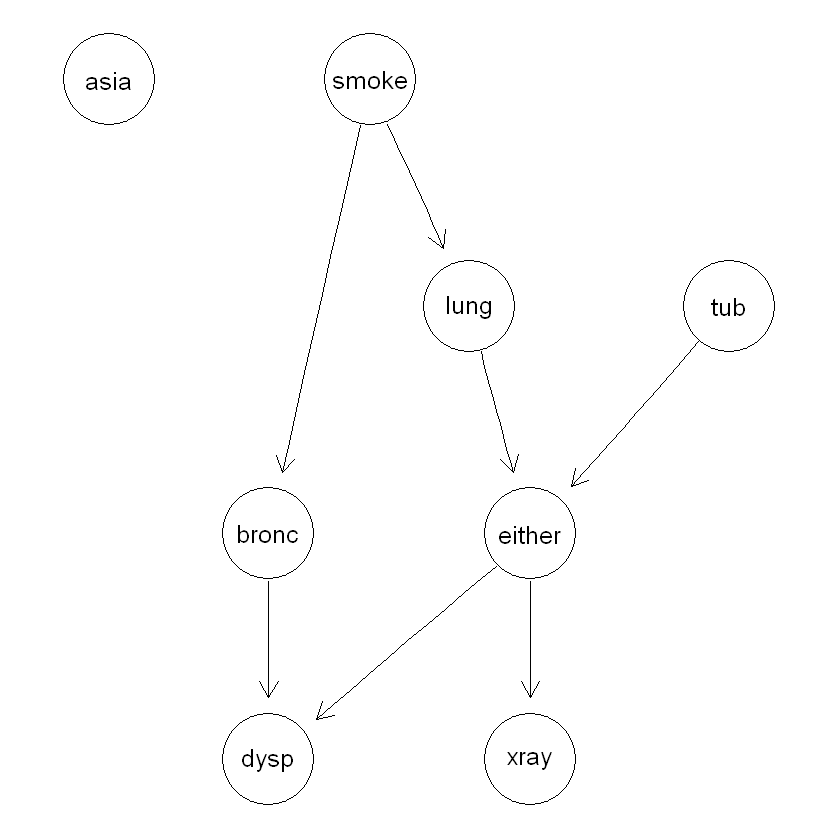

In [9]:
dag = get_dag(names(DF), struct$dag)
graphviz.plot(dag)

## `bnlearn` comparison

In [10]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node asia (multinomial distribution)

Conditional probability table:
          1          2 
0.99030969 0.00969031 

  Parameters of node bronc (multinomial distribution)

Conditional probability table:
 
     smoke
bronc         1         2
    1 0.7019402 0.4023997
    2 0.2980598 0.5976003

  Parameters of node dysp (multinomial distribution)

Conditional probability table:
 
, , either = 1

    bronc
dysp          1          2
   1 0.90456925 0.18717389
   2 0.09543075 0.81282611

, , either = 2

    bronc
dysp          1          2
   1 0.29202773 0.09827834
   2 0.70797227 0.90172166


  Parameters of node either (multinomial distribution)

Conditional probability table:
 
, , tub = 1

      lung
either            1            2
     1 0.9998666026 0.0023474178
     2 0.0001333974 0.9976525822

, , tub = 2

      lung
either            1            2
     1 0.0126903553 0.1470588235
     2 0.9873096447 0.8529411765


  Parameters of

In [11]:
# recall that when we make this test H_0 = (x, y) are independent
ci.test(x = 'asia', y = 'tub', z = 'xray', data = DF, test = 'mi')

# this shows that since the p-value is low, by 
# taking a 5% significance level we can reject the null 
# hyp and say that x3 and x2 depend on each other


	Mutual Information (disc.)

data:  asia ~ tub | xray
mi = 5.5746, df = 2, p-value = 0.06159
alternative hypothesis: true value is greater than 0


In [12]:
# this may say something about the structure we got through K2
ci.test(x = 'dysp', y = 'asia', z = 'smoke', data = DF, test = 'mi')


	Mutual Information (disc.)

data:  dysp ~ asia | smoke
mi = 1.881, df = 2, p-value = 0.3904
alternative hypothesis: true value is greater than 0


In [13]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -22268.26

[1] -22255.59

In [14]:
arc.strength(dag, data=DF, criterion="x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,smoke,lung,2.383690e-82
2,smoke,bronc,8.836046e-200
3,lung,either,0.000000e+00
4,tub,either,0.000000e+00
5,either,xray,0.000000e+00
6,bronc,dysp,0.000000e+00
7,either,dysp,2.604111e-205


In [15]:
# what if we add an arc from asia to tub? Is it better?
dag <- set.arc(dag, from = "asia", to = "tub")

In [16]:
arc.strength(dag, data=DF, criterion="x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,smoke,lung,2.383690e-82
2,smoke,bronc,8.836046e-200
3,lung,either,0.000000e+00
4,tub,either,0.000000e+00
5,either,xray,0.000000e+00
6,bronc,dysp,0.000000e+00
7,either,dysp,2.604111e-205
8,asia,tub,1.415618e-03


In [17]:
score(dag, data = DF, type = 'bic')

[1] -22270.03

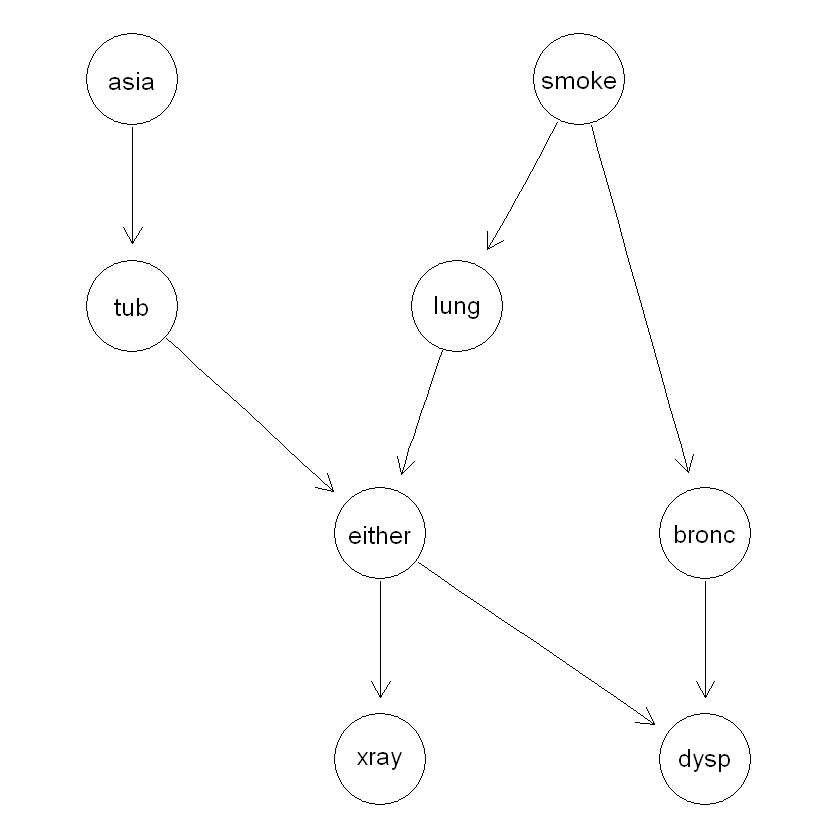

In [18]:
graphviz.plot(dag)

Caricamento dei namespace richiesti: lattice



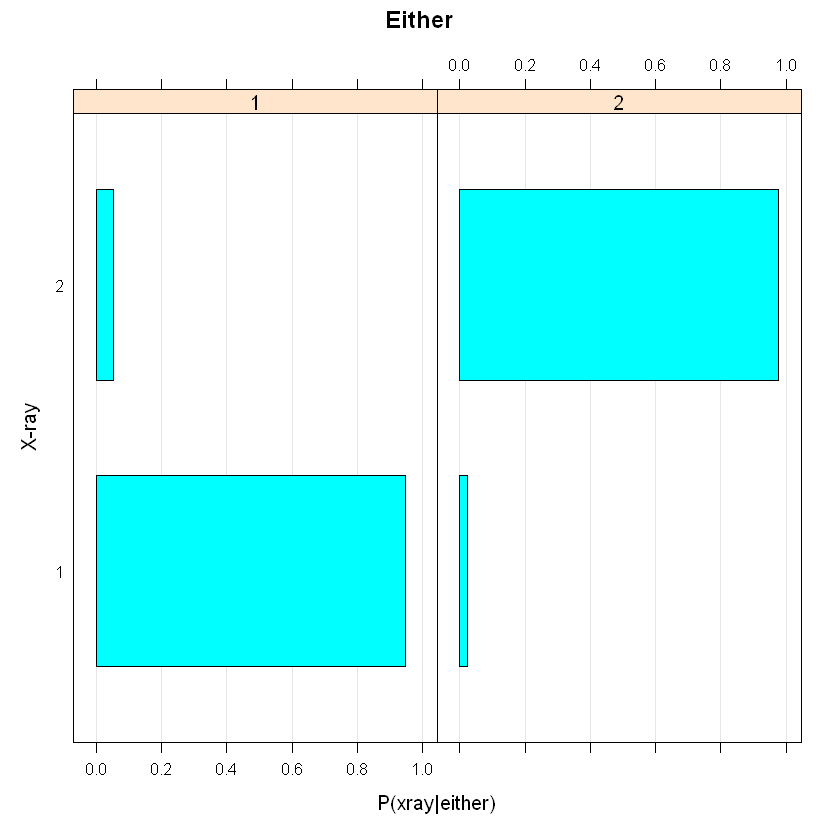

In [19]:
bn.fit.barchart(bn_bayes$xray, "Either", xlab="P(xray|either)", ylab="X-ray")

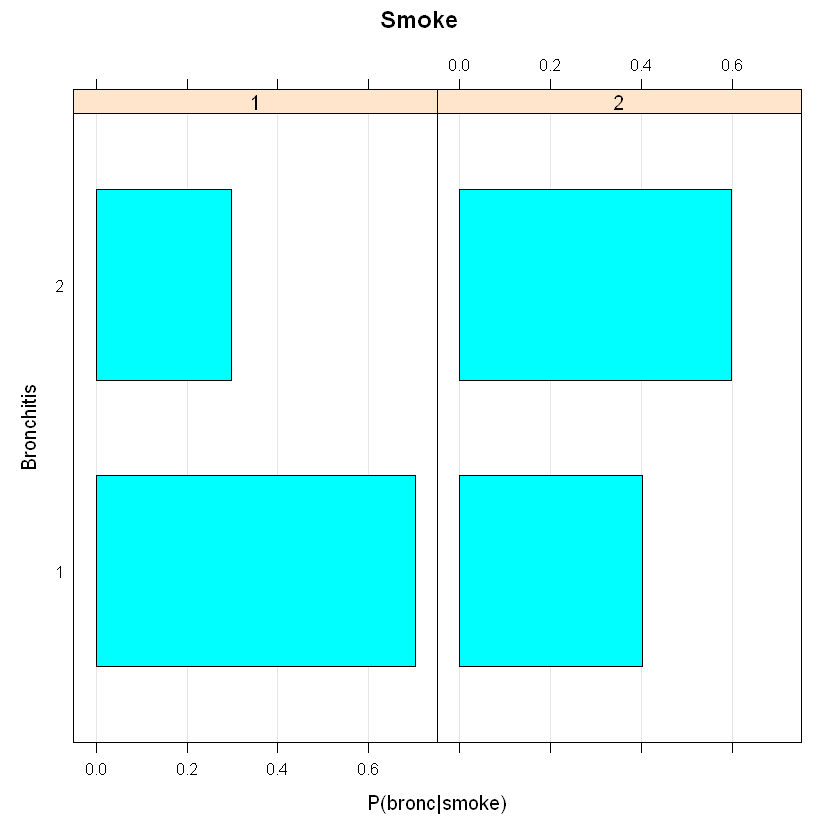

In [20]:
bn.fit.barchart(bn_bayes$bronc, "Smoke", xlab="P(bronc|smoke)", ylab="Bronchitis")

In [21]:
bn_bayes$xray


  Parameters of node xray (multinomial distribution)

Conditional probability table:
 
    either
xray          1          2
   1 0.94830897 0.02276295
   2 0.05169103 0.97723705

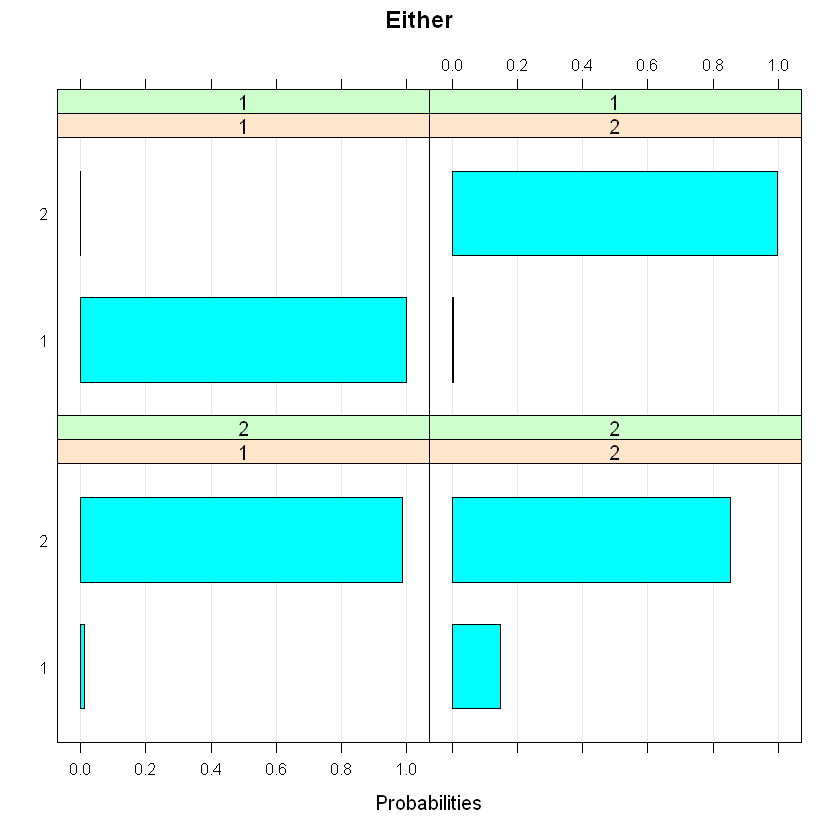

In [22]:
bn.fit.barchart(bn_bayes$either, "Either", xlab="Probabilities", ylab="")

In [23]:
bn_bayes$either


  Parameters of node either (multinomial distribution)

Conditional probability table:
 
, , tub = 1

      lung
either            1            2
     1 0.9998666026 0.0023474178
     2 0.0001333974 0.9976525822

, , tub = 2

      lung
either            1            2
     1 0.0126903553 0.1470588235
     2 0.9873096447 0.8529411765


* checking which nodes are needed.
  > event involves the following nodes: asia 
  > evidence involves the following nodes: dysp smoke 
  > upper closure is ' asia dysp bronc either lung tub smoke '
  > generating observations from 7 / 8 nodes.
* generated 10000 samples from the bayesian network.
  > evidence matches 2202 samples out of 10000 (p = 0.2202).
  > event matches 18 samples out of 2202 (p = 0.008174387).
num of evidence & event in the dataset: 18 
num of evidence in the dataset: 2195 
Conditional prob. based on the frequency: 0.008200456 


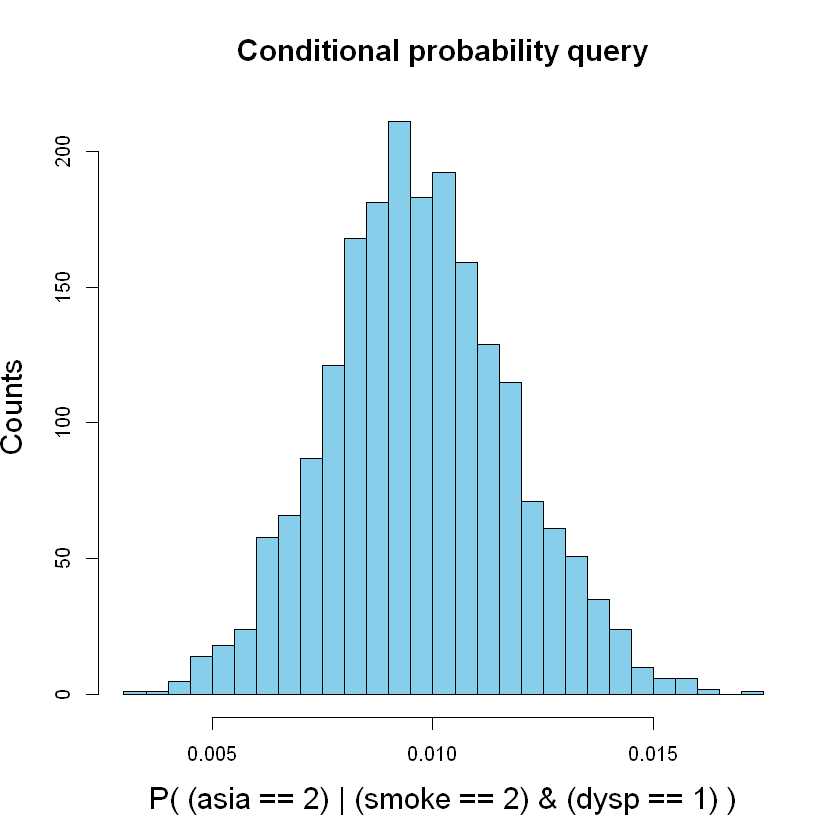

In [24]:
cpq = function(event, evidence){
    a = rep(0, 2000)
    str1 = paste("cpquery(bn_bayes, ", event, ", ", evidence, ", debug=i == 1, n=10000)")
    prs1 = parse(text=str1)
    for (i in 1:2000){
        a[i] = eval(prs1)
    }

    hist(a, breaks='scott', xlab=paste("P(", event, "|", evidence, ")"), ylab="Counts", 
    col="skyblue", main="Conditional probability query", cex.main = 1.5, cex.lab = 1.5)

    num = eval(parse(text=paste("(filter(DF, (", event," & ", evidence,")) %>% count())$n")))
    den = eval(parse(text=paste("(filter(DF, (", evidence,")) %>% count())$n")))
    cat("num of evidence & event in the dataset:", num, "\n")
    cat("num of evidence in the dataset:", den, "\n")
    cat("Conditional prob. based on the frequency:", num/den, "\n")
}

event = "(asia == 2)"
evidence = "(smoke == 2) & (dysp == 1)"

cpq(event, evidence)